# Using Google Colab

Read through the **Getting started** paragraph in the [official documentation](https://colab.research.google.com/). You may also want to take a look into the **More resources** section.

To add a new code block or text block, use the buttons in the menus above or hover your mouse between two blocks, where more buttons should appear.

To execute all code blocks within this document, select `Runtime -> Run all`. When you submit your solution, this should run without throwing an error.

Sometimes, previously defined variables cause trouble in later executions. If this is the case, you can select `Runtime -> Restart runtime` to restart the runtime and erase all previous definitions.

# Guidelines for Solving the Assignments

In these assignments, you are expected to implement the algorithms yourself rather than relying on Python’s built-in functions that already solve essential parts of the task, such as `index`, `min`, `max`, or `sort`. However, it is of course fine to use general-purpose functions like `len` or `range`.

You may discuss the assignments in general terms with other groups to clarify ideas, but every group must produce their own solutions independently. Copying solutions (or parts thereof) from other groups or from external sources is strictly prohibited—this includes material generated by AI text generators such as ChatGPT or similar tools.

# Work Distribution

***As previous assignment. We have distributed the work equally by working the whole group as a team and solving the assignment together. We've had group meetings and done the work at the meetings together by discussing our results for each part. We coded multiple versions of each problem, and selected the best one after discussion.***

# Initialisation

This section contains code that is later used to test, measure and plot your implementations. You need to run it once to initialise it.

⇩ Click here to initialise the code.

In [ ]:
# tests

import random

def shuffle(list):
  random.shuffle(list)
  return list

tests = [(name, unsorted, sorted(unsorted)) for (name, unsorted) in [
    ("empty list", []),
    ("one element", [42]),
    ("digits ascending", list(range(10))),
    ("digits descending", list(reversed(range(10)))),
    ("digits shuffled", shuffle(list(range(10)))),
    ("all entries the same", [42 for _ in range(10)]),
    ("some duplicates", shuffle(list(range(10)) + list(range(5)))),
    ("negative numbers", shuffle([x - 10 for x in list(range(20))])),
    ("float numbers", shuffle([x * 3.14 for x in list(range(20))])),
    ("mixed numbers", shuffle([x * 3.14 for x in list(range(10))] + list(range(10)))),
    *[("random numbers " + str(idx) + " (small)", [random.randrange(1000) for _ in range(20)]) for idx in range(0, 5)],
    *[("random numbers " + str(idx) + " (medium)", [random.randrange(10000) for _ in range(200)]) for idx in range(5, 10)],
    *[("random numbers " + str(idx) + " (large)", [random.randrange(100000) for _ in range(2000)]) for idx in range(10, 15)],
]]

def run_tests(fun):
  print("executing all tests on %s..." % (fun.__name__))
  ok = 0
  err = 0
  for name, input, expected in tests:
    copy = input.copy()
    try:
      fun(copy)
    except Exception as e:
      print("Test '%s' raised an exception!\n  input:     %s\n  expected:  %s\n  exception: %s" % (name, input, expected, e))
      raise e
    else:
      if copy == expected:
        print("Test '%s' passed!" % (name))
        ok += 1
      else:
        print("Test '%s' failed!\n  input:     %s\n  output:    %s\n  expected:  %s" % (name, input, copy, expected))
        err +=1
  print("%s (summary): %d/%d OK, %d/%d ERROR" % (fun.__name__, ok, len(tests), err, len(tests)))

# runtime parameters
num_samples = 20
sizes = [2000 * i for i in range(1, 10)]

# runtime measurement
import time
runtimeDict = {}
def measure_runtime(funs):
  inputs = [[[random.random() for _ in range(size)] for _ in range(num_samples)] for size in sizes]

  for fun in funs:
    runtimes = []
    for batch in inputs:
      batch_rt = []
      for input in batch:
        copy = input.copy()
        start_time = time.time()
        fun(copy)
        end_time = time.time()
        batch_rt.append(end_time - start_time)
      runtimes.append(min(batch_rt))
    runtimeDict[fun.__name__] = runtimes

# runtime plot
import matplotlib.pyplot as plt
def plot_runtime(funs, funs_checkered=None):
  for fun in funs:
    plt.plot(sizes, runtimeDict[fun.__name__], label=fun.__name__)
  if funs_checkered:
    plt.gca().set_prop_cycle(None)
    for fun in funs_checkered:
      plt.plot(sizes, runtimeDict[fun.__name__], '--', label=fun.__name__)

  plt.xlabel('List Length')
  plt.ylabel('Runtime (seconds)')
  plt.title('Runtime vs List Length')

  plt.legend()
  plt.show()

# Sorting Algorithms

In this exercise, you are going to implement the *Merge Sort*, *Quick Sort* and *Heap Sort* algorithms.

- Each of your sorting functions should accept an unsorted list of numbers and sort it. Of course, you are allowed to add as many helper functions as needed.
- Note that arrays (or lists) in the textbook are indexed from 1, whereas in Python (and most other programming languages) they are indexed from 0.
- Your implementation should have a good performance with respect to the asymptotic complexity found in the literature.

At the bottom of each code block, there is a function call to test your algorithm implementation. Run it to check if your implementation is correct.

Below the algorithms in this document, there is a code block that reports runtime statistics. Furthermore, at the end of the document, there are a couple of questions you should answer.

### 1. Merge Sort (2 points)

Implement Merge Sort as seen in the lecture.

Hint: Start by implementing `merge` and then use it to implement `mergesort`.

In [ ]:
def merge(A, p, q, r):
    left = A[p:q+1]
    right = A[q+1:r+1]

    left.append(float('inf'))
    right.append(float('inf'))

    i = j = 0
    for k in range(p, r+1):
        if left[i] <= right[j]:
            A[k] = left[i]
            i += 1
        else:
            A[k] = right[j]
            j += 1

def mergesort_helper(A, p, r):
    if p < r:
        q = (p + r) // 2

        mergesort_helper(A, p, q)
        mergesort_helper(A, q+1, r)
        merge(A, p, q, r)

def mergesort(A):
    mergesort_helper(A, 0, len(A)-1)

run_tests(mergesort)

executing all tests on mergesort...
Test 'empty list' passed!
Test 'one element' passed!
Test 'digits ascending' passed!
Test 'digits descending' passed!
Test 'digits shuffled' passed!
Test 'all entries the same' passed!
Test 'some duplicates' passed!
Test 'negative numbers' passed!
Test 'float numbers' passed!
Test 'mixed numbers' passed!
Test 'random numbers 0 (small)' passed!
Test 'random numbers 1 (small)' passed!
Test 'random numbers 2 (small)' passed!
Test 'random numbers 3 (small)' passed!
Test 'random numbers 4 (small)' passed!
Test 'random numbers 5 (medium)' passed!
Test 'random numbers 6 (medium)' passed!
Test 'random numbers 7 (medium)' passed!
Test 'random numbers 8 (medium)' passed!
Test 'random numbers 9 (medium)' passed!
Test 'random numbers 10 (large)' passed!
Test 'random numbers 11 (large)' passed!
Test 'random numbers 12 (large)' passed!
Test 'random numbers 13 (large)' passed!
Test 'random numbers 14 (large)' passed!
mergesort (summary): 25/25 OK, 0/25 ERROR


### 2. Quick Sort (2 points)

Implement Quick Sort as seen in the lecture.

Hint: Start by implementing `partition` and then use it to implement `quicksort`.

In [ ]:

def pivot_median_of_three(A, first, middle, last):
    a, b, c = A[first], A[middle], A[last]
    if (a <= b <= c) or (c <= b <= a):
        return middle
    elif (b <= a <= c) or (c <= a <= b):
        return first
    else:
        return last

def Partition(A, first_index, last_index):
    #Välj pivot med median of three
    middle_index = (first_index + last_index) // 2
    pivot_index = pivot_median_of_three(A, first_index, middle_index, last_index)
    pivot_value = A[pivot_index]

#Flytta pivot till slutet
    A[pivot_index], A[last_index] = A[last_index], A[pivot_index]

    i = first_index - 1

    for j in range(first_index, last_index):
        if A[j] <= pivot_value:
            i += 1
            A[i], A[j] = A[j], A[i]

    A[i+1], A[last_index] = A[last_index], A[i+1]

    return i + 1 #index för pivot


def Quicksort(A, p, r):
    if p < r:
        q = Partition(A, p, r)
        Quicksort(A, p, q-1)
        Quicksort(A, q+1, r)

def quicksort(lista):
    A = lista
    p = 0
    r = len(A) -1
    return Quicksort(A, p, r)


run_tests(quicksort)

executing all tests on quicksort...
Test 'empty list' passed!
Test 'one element' passed!
Test 'digits ascending' passed!
Test 'digits descending' passed!
Test 'digits shuffled' passed!
Test 'all entries the same' passed!
Test 'some duplicates' passed!
Test 'negative numbers' passed!
Test 'float numbers' passed!
Test 'mixed numbers' passed!
Test 'random numbers 0 (small)' passed!
Test 'random numbers 1 (small)' passed!
Test 'random numbers 2 (small)' passed!
Test 'random numbers 3 (small)' passed!
Test 'random numbers 4 (small)' passed!
Test 'random numbers 5 (medium)' passed!
Test 'random numbers 6 (medium)' passed!
Test 'random numbers 7 (medium)' passed!
Test 'random numbers 8 (medium)' passed!
Test 'random numbers 9 (medium)' passed!
Test 'random numbers 10 (large)' passed!
Test 'random numbers 11 (large)' passed!
Test 'random numbers 12 (large)' passed!
Test 'random numbers 13 (large)' passed!
Test 'random numbers 14 (large)' passed!
quicksort (summary): 25/25 OK, 0/25 ERROR


### 3. Heap Sort (3 points)

Implement Heap Sort as seen in the lecture.

Note that you do not have to define a new class for heaps (unless you
want to), instead you can just use a plain list to store the heap and
pass along an extra parameter `heap_size` to the functions that need it.

Hint: Start by implementing `max_heapify` and `build_max_heap`, and then use them to implement `heapsort`.

In [ ]:
from re import A

def swap(toBsorted, a, b):
    toBsorted[a], toBsorted[b] = toBsorted[b], toBsorted[a]

def max_heapify(A, i, heap_size):
  l = i * 2
  r = i * 2 + 1
  largest = i
  if l < heap_size and A[i] < A[l]:
    largest = l
  if r < heap_size and A[largest] < A[r]:
    largest = r

  if largest != i:
    swap(A, i, largest)
    max_heapify(A, largest, heap_size)

def build_max_heap(A, heap_size):
  for i in range(heap_size//2-1, -1, -1): # We know half, or half plus one of all nodes (positions in list), is a leaf. They are therefore not checked for heapify.
    max_heapify(A, i, heap_size)


def heapsort(A):
  heap_size = len(A)
  build_max_heap(A, heap_size)
  while heap_size > 1:
    swap(A, 0, heap_size-1)
    heap_size -= 1
    max_heapify(A, 0, heap_size)
  return A

run_tests(heapsort)

executing all tests on heapsort...
Test 'empty list' passed!
Test 'one element' passed!
Test 'digits ascending' passed!
Test 'digits descending' passed!
Test 'digits shuffled' passed!
Test 'all entries the same' passed!
Test 'some duplicates' passed!
Test 'negative numbers' passed!
Test 'float numbers' passed!
Test 'mixed numbers' passed!
Test 'random numbers 0 (small)' passed!
Test 'random numbers 1 (small)' passed!
Test 'random numbers 2 (small)' passed!
Test 'random numbers 3 (small)' passed!
Test 'random numbers 4 (small)' passed!
Test 'random numbers 5 (medium)' passed!
Test 'random numbers 6 (medium)' passed!
Test 'random numbers 7 (medium)' passed!
Test 'random numbers 8 (medium)' passed!
Test 'random numbers 9 (medium)' passed!
Test 'random numbers 10 (large)' passed!
Test 'random numbers 11 (large)' passed!
Test 'random numbers 12 (large)' passed!
Test 'random numbers 13 (large)' passed!
Test 'random numbers 14 (large)' passed!
heapsort (summary): 25/25 OK, 0/25 ERROR


### 4. Runtime Comparisons (2 points)

The following code will measure the runtime of your algorithm implementations.

Compare the reported runtimes. What do you observe? How do you explain your observations?

How do the runtimes compare to those from the first assignment sheet (Insertion Sort, Selection Sort, Sink Sort)?

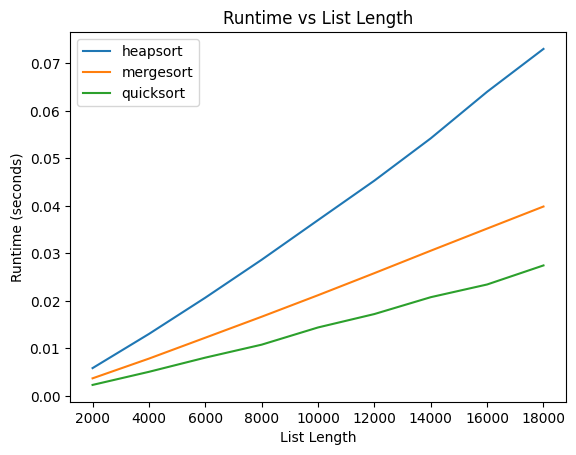

In [ ]:
measure_runtime([heapsort, mergesort, quicksort])
plot_runtime([heapsort, mergesort, quicksort])

**Answer:**

**What do you observe?**

From the graph we observe that Quicksort has the shortest runtime of the tree algorithms which concludes in that it is faster than Heapsort and Mergesort. Mergesort is faster than heapsort, but not as fast as Quicksort. Heapsort is the slowest of the algorithms.



**How do you explain your observations?**

While observing the graphs for quicksort, mergesort and heapsort in the Runtime vs List length plot, we can see that the graphs look somewhat similar to a linear curve, however with a slight upward curve when increasing the length of the list. For a time complexity O(n log n) the runtime will scale similarly to linear time, with the log(n) providing a small acceleration in runtime. This shows that for all three algorithms, the average-time complexity is O(n log n).

Quick sort chooses a pivot element and thereafter divides the array depending on if the value is bigger and smaller than the pivot element. The algorithm is recursive and requires a simple divide and conquer method. Since we use the median of three for choosing the pivot, it will most likely take on a value somewhere in the middle, resulting in a faster runtime on average

Merge sort is also an algorithm derived from the divide and conquer algorithm, sorting the array by dividing it into smaller units and thereafter merging the units by comparing each value between the units.

Heapsort uses a lot of operations to restructure the heap. This is due to the root always being removed as the largest object in the heap. When using max_heapify, it goes through quite a lot of comparisons and swaps in the array if the root should be placed quite far down in the heap.

When analyzing each algorithm, we can see that heapsort requires more operations per element compared to both quicksort and mergesort, resulting in being the slowest of the algorithms. In comparison between quicksort and merge sort, we see yet again that quicksort requires less operations per element than merge sort. Merge sort also requires temporary arrays which require allocation of space, increasing the runtime of the algorithm.


**How do the runtimes compare to those from the first assignment sheet (Insertion Sort, Selection Sort, Sink Sort)?**

When observing and analyzing the runtime vs list length graph we can see that the runtimes for the three algorithms in Assignment 2 are noticeably faster than the algorithms in assignment 1 (see graph below, also note our insertionsort is not as efficient as possible). They also accelerate much slower compared to the previous algorithms. This is expected since insertion-, selection- and sink sort all have the time complexity of O(n2) while heap-, quick- and mergesort have the time complexity of O(n log n). Worth mentioning is that algorithms with time complexity of O(n2) can be faster for small, nearly sorted arrays. An example is insertionsort, as the algorithm is a simpler algorithm, with less constants increasing the total runtime.

***

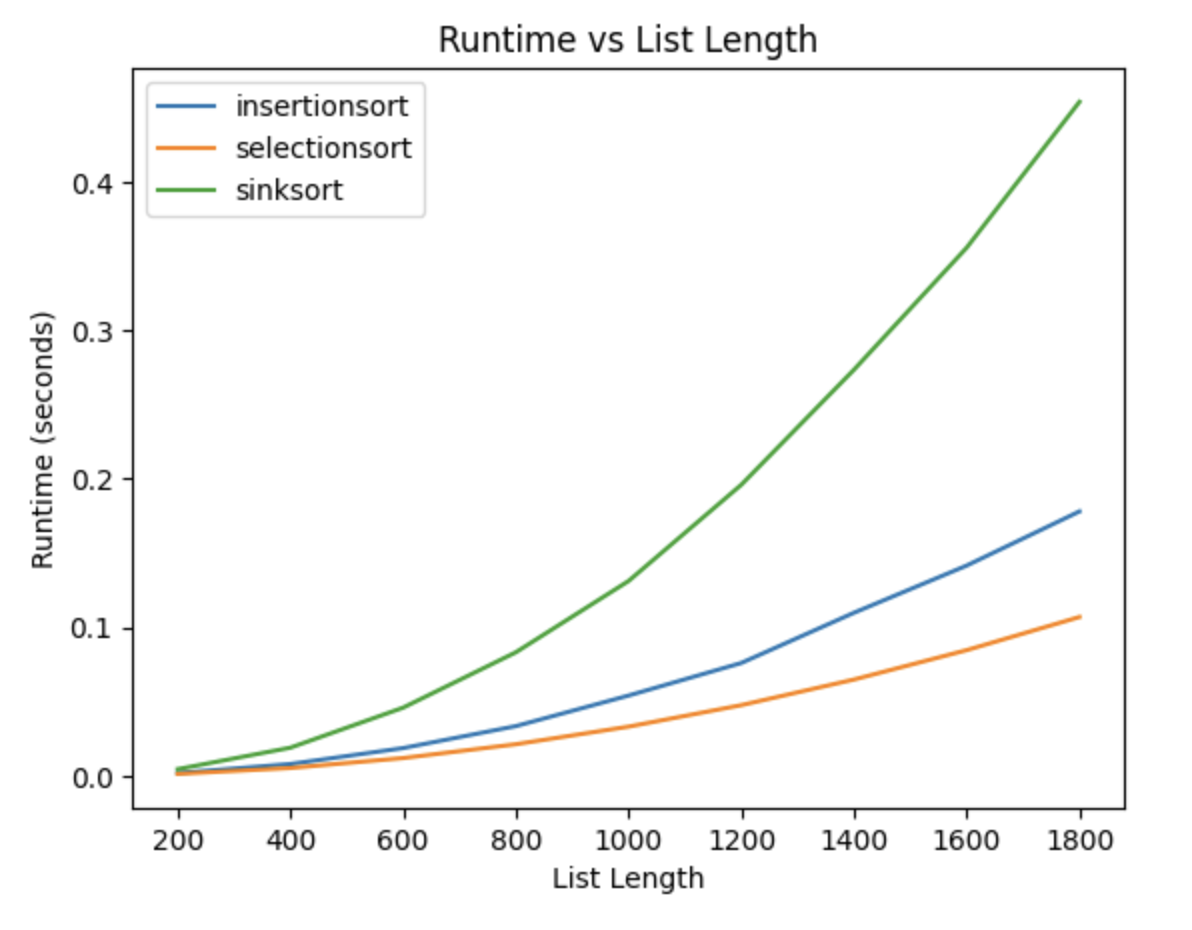

Runtime vs List Length

### 5. Runtime Approximations (1 point)

Remark: In this question, we will take Heap Sort as an example, but the results also carry over to Merge Sort or Quick Sort.

Using the statistics from the tests, find a constant `c` such that `f_heap(n) = c * n` is a *linear* (!) function which *approximately* describes the runtime of Heap Sort in *seconds*, depending on the input size `n`.

Implement the function and look at the runtime plot below. You should notice that `f_heap` seems to be a good approximation of the runtime of Heap Sort (usually not much more than 10% error), at least in the displayed range of `n = 2000, ..., 18000`.

Compare to the asymptotic runtime of Heap Sort known from the lecture. How do you explain your observation? Will the approximation still be good with smaller or larger input sizes?

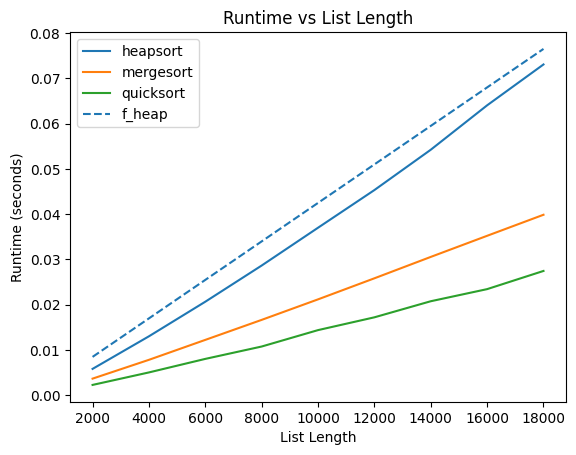

In [ ]:
def f_heap(size):
  x = sizes
  y = runtimeDict['heapsort']

  c = (y[-1]-y[0])/(x[-1]-x[0])

  return c * size

""" The following is an alternative version, which uses an average of x and y values
  x_mean = sum(x)
  y_mean = sum(y)
  c = y_mean/x_mean
"""

# plot all functions
runtimeDict[f_heap.__name__] = [f_heap(size) for size in sizes]
plot_runtime([heapsort, mergesort, quicksort], [f_heap])

**Answer:**

We choose to approximate by calculating the slope between the runtime of the shortest list measured, and the runtime of the longest list measured. This gave us an approximation of the runtime curve, as a linear curve.

The time complexity of Heapsort is O(nlog(n)) for best, worst (assumnig distinct elements), and average case. Compared to our approximation of O(n), this works well as the factor log(n) increases very slowly. This can be seen in our graph, as the approximation is quite close to the runtime of heapsort.

However, one can see that the runtime accelerates for larger lists, seen here as the actual runtime approxes our aproximation. The same goes for smaller values.

Note that nlog(n) will trend toward a linear slope, as the log(n) factor will increase slower and slower at larger values. By creating a new approximation from larger list lengths, the approximation will be better for a larger intervall of lengths. But much worse for smaller ones.

To summarize, the linear approximation works for this interval of list sizes, but due to the log(n) factor of O(nlog(n)), the runtime curve is not entirely linear.